## Loading the AGNews data

In [8]:
# Importing modules
import pandas as pd

# Read data
data = pd.read_csv("AG News Dataset.csv")

# Print out the first rows of data
data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


## Preparing the data for analysis

In [9]:
# Remove the columns with non text data types
data = data.drop(['Class Index'], axis=1)

# Print out the first rows of data
data.head()

,Title,Description
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


##  Preprocessing the text data

In [10]:
# Load the regular expression library
import re

# Print the descriptions of the first rows 
print(data['Description'].head())

# Remove punctuation
data['Description_processed'] = data['Description'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the Description to lowercase
data['Description_processed'] = data['Description_processed'].str.lower()

# Print the processed Description of the first rows 
data.head()

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: Description, dtype: object


,Title,Description,Description_processed
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",reuters - short-sellers wall street's dwindlin...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,reuters - private investment firm carlyle grou...
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,reuters - soaring crude prices plus worries\ab...
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,reuters - authorities have halted oil export\f...
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",afp - tearaway world oil prices toppling recor...


## word cloud to visualize the preprocessed text data

In [15]:
## a word cloud is a visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

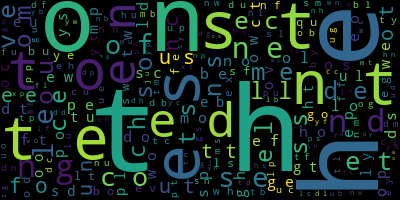

In [13]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = data['Description_processed'].apply(lambda x: ' '.join(x))

# Create a WordCloud object
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string.str.cat())

# Visualize the word cloud
wordcloud.to_image()

## Prepare the text for LDA analysis

LDA stands for Latent Dirichlet Allocation. It is a topic modeling algorithm that is used to identify the topics present in a text document. It is a generative statistical model that assumes that each document is a mixture of topics and each topic is a mixture of words. The number of topics is a hyperparameter that needs to be specified before running the LDA algorithm.

In [16]:
# import LDA from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [17]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words

In [25]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()


In [26]:
# Initialise the count vectorizer with the English stop words
from sklearn.feature_extraction import text

count_vectorizer = CountVectorizer(stop_words=list(text.ENGLISH_STOP_WORDS))

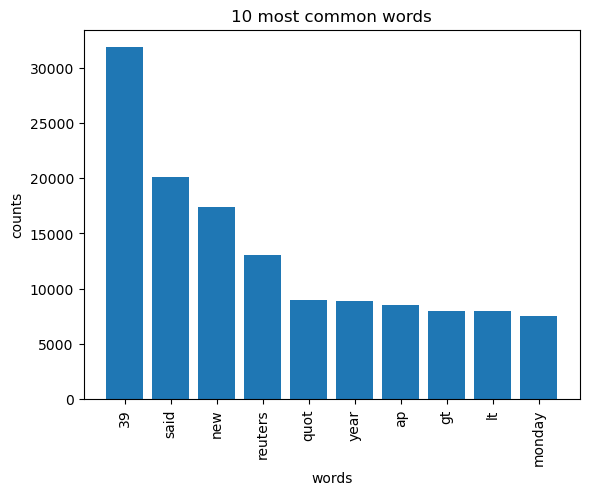

In [28]:
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['Description_processed'])

# Visualise the 10 most common words 
plot_10_most_common_words(count_data, count_vectorizer)

## Analysing trends with LDA

In [29]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [30]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [32]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
said president 39 reuters iraq minister people ap government killed

Topic #1:
gt lt new microsoft software internet reuters target http href

Topic #2:
39 quot world new athens olympic said year gold court

Topic #3:
said new 39 oil reuters company year percent prices million

Topic #4:
39 game ap new season night team league win victory
